In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering

np.set_printoptions(precision=4, suppress=True)
print("✅ Imports done: numpy, pandas, matplotlib, sklearn AgglomerativeClustering")


✅ Imports done: numpy, pandas, matplotlib, sklearn AgglomerativeClustering


In [3]:
df = pd.DataFrame({
    "x": [1.0, 1.2, 0.8, 1.4,   5.0, 5.2, 4.8, 5.4,   9.0, 9.2, 8.8, 9.4],
    "y": [1.0, 0.9, 1.1, 1.2,   5.0, 4.9, 5.1, 5.2,   9.0, 8.9, 9.1, 9.2],
}, index=[f"P{i}" for i in range(1, 13)])

print("✅ Dataset (12 points, 2 features):")
display(df)


✅ Dataset (12 points, 2 features):


,x,y
P1,1.0,1.0
P2,1.2,0.9
P3,0.8,1.1
P4,1.4,1.2
P5,5.0,5.0
P6,5.2,4.9
P7,4.8,5.1
P8,5.4,5.2
P9,9.0,9.0
P10,9.2,8.9


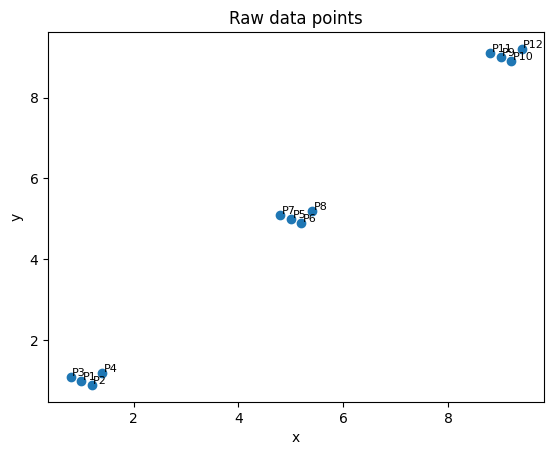

In [4]:
plt.figure()
plt.scatter(df["x"], df["y"])
for name, row in df.iterrows():
    plt.text(row["x"] + 0.03, row["y"] + 0.03, name, fontsize=8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw data points")
plt.show()


In [5]:
X = df.values
k = 3

agg = AgglomerativeClustering(n_clusters=k, linkage="ward")
labels = agg.fit_predict(X)

print("✅ AgglomerativeClustering fitted (Ward linkage)")
print("Labels (cluster id for each point):")
labels_series = pd.Series(labels, index=df.index, name="cluster")
print(labels_series.to_string())

df_out = df.copy()
df_out["cluster"] = labels
print("\n✅ Dataset with assigned clusters:")
display(df_out)


✅ AgglomerativeClustering fitted (Ward linkage)
Labels (cluster id for each point):
P1     2
P2     2
P3     2
P4     2
P5     0
P6     0
P7     0
P8     0
P9     1
P10    1
P11    1
P12    1

✅ Dataset with assigned clusters:


,x,y,cluster
P1,1.0,1.0,2
P2,1.2,0.9,2
P3,0.8,1.1,2
P4,1.4,1.2,2
P5,5.0,5.0,0
P6,5.2,4.9,0
P7,4.8,5.1,0
P8,5.4,5.2,0
P9,9.0,9.0,1
P10,9.2,8.9,1


✅ Linkage matrix shape: (11, 4)
First 5 merge steps (rows: [cluster1, cluster2, distance, sample_count]):
[[ 8.     10.      0.2236  2.    ]
 [ 0.      1.      0.2236  2.    ]
 [ 4.      6.      0.2236  2.    ]
 [ 9.     11.      0.3606  2.    ]
 [ 5.      7.      0.3606  2.    ]]


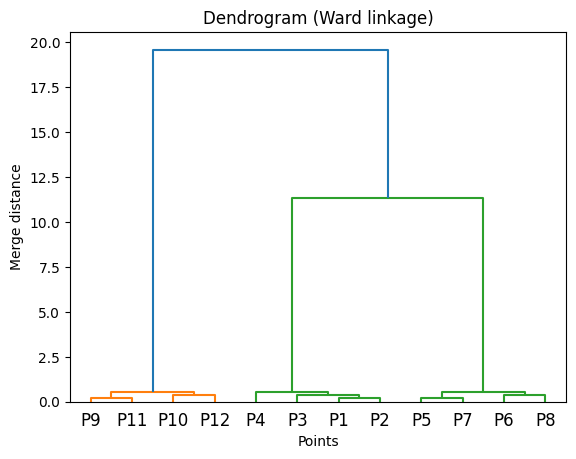

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X, method="ward")

print("✅ Linkage matrix shape:", Z.shape)
print("First 5 merge steps (rows: [cluster1, cluster2, distance, sample_count]):")
print(np.round(Z[:5], 4))

plt.figure()
dendrogram(Z, labels=df.index.tolist())
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Points")
plt.ylabel("Merge distance")
plt.show()
